---

# Deutsch Algorithm

The Deutsch Algorithm presents a quantum computing solution to a special class of problem that cannot be best by any classical computer. 

## Introduction
A broader implementation of this algorithm known as Deutsch-Jozsa Algorithm describes a solution to this class of problem when the number of input bit is not restricted to one.
For a better articulation to the problem at hand, the description will be based on the Deutsch-Jozsa Algorithm and the implementation in this text will be based on the Deutsch Algorithm where number of input bit is just one. 
The Deutsch-Jozsa Alogrithm demonstrates a quantum algorithm that is exponentially faster than any possible deterministic classical algorithm for a specifically designed problem.
The problem in question which will be referred to as the `Deutsch-Jozsa problem` in this text, is a black-box problem which can be solved efficiently by a quantum computer
with no error. 
Before delving further into the algorithm, the next section talks about the formulation of the problem.

### Deutsch-Jozsa Problem

The Deutsch-Jozsa Problem can be stated as follows, given a function $f$ that takes $n$ bits as input and outputs either $0$ or $1$ dependent if the function $f$ is constant or balanced, ie. $f: \{0, 1\} ^n \to \{0, 1\}$, 
determine if the function is constant or balanced. Constant in this context is when for all inputs, the output is always $0$  or $1$  
and balanced when the for all possible inputs,  half of possible outputs are $0$s and other half $1$s. The problem is such that for all possible input domain we are promised that the outputs will either be constant or balanced. This can be stated as follows:

Having a black box device say $U_{f}$, that computes a function $f: D_m \to R_n $. For a given input of $x, U_f$ will output a value of $f(x)$. The definition of the 
problem states that when given $U_f$, then using it to determine determine some property of $f$ while making the least possible number of calls to $U_f$. The problem
definition assumes that $U_f$ is an oracle for $f$ and there is not faster method of obtaining the property of $f$ from the oracle $U_f$ than making sufficient number
of calls to $U_f$ to be able to conclusively ascertain the property of $f$.

$$ 
  f: \{0, 1\} ^ {n} \to \begin{cases} 
  0 & \text{if} &
   \sum\limits_{i = 1} ^ {n} \bigl( f(x_{i}) = 1 \bigr) =  \sum\limits_{i = 1} ^ {n} \bigl( f(x_{i}) = 0 \bigr) 
        \\
  1 & \text{if} &
     \sum\limits_{i=1}^n \bigl( f(x_{i}) = k\bigr) = n & k \in \{0, 1\}
    \end{cases} 
$$

> Where `n` is the number of possible inputs, $x_{i}$ is the $i$`th` possible input

#### Classical Algorithm
Modeling a solution to this class of problem using a classical algorithm will involve iteratively calling the function and noting the output, until one can 
conclude that the function is either constant or balanced.
For a function that accepts $n$ bits binary input, the input domain will be $2^{n}$ input domain. The function can be said to be balanced as soon as the function returns 
two different values given some input from the input domain. In such case where the first two different output values given some input are observed is considered a best 
case scenario. 
##### **Best Case Scenario**
For this class of problem, the very best case scenario will be when the first two inputs returns exclusive result. We can and this point, authoritatively state that the 
function is balanced.     
##### **Worst Case Scenario**
However, after getting the result from the first input $x_{0}$, say $g$ where $g\in\{0, 1\}$. As subsequent inputs in the input domain keeps returning the same value 
$g$, we cannot for obvious reasons conclude that function is either constant or balanced. Since we were promised that the function is either balanced or constant and 
nothing in-between, there  will be a point where we can conclude that the function cannot possibly be balanced. This point is at the $i$ th trial, where 
$i = \bigl( \frac{2^{n}}{2} \bigr) + 1.$ This can be re-written as $2^{n - 1} + 1$, and considered the worst case scenario. 
$$$$
The scenarios can be represented diagrammatically as below. 

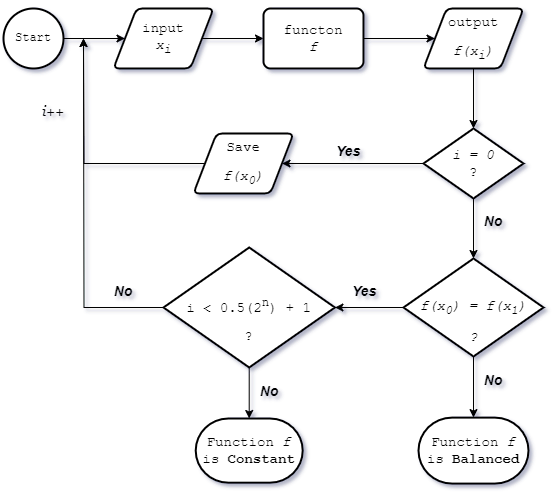

<u>*Figure 1*</u>

## Classical Information 

To aid present quantum information, we will be introducing some notations with their classical equivalent side by side and also perform classical operations using this notations. 

### Classical States

This represents the state of a classical information at any given point in time. Consider an one bit information which is either the state '0' or '1', this is analogous to a piece of tossed fair coin which can either be the head or tail. For the purpose of this text, we consider the head as '0' and the tail as '1'. We can say that the probability of the coin flipping to a '0' or a '1' is 50% - 50% i.e. $P(0) = 0.5$ and $P(1) = 0.5$. This can be represented by a probability vector of the form $\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}$. Vectors of this form (probability) are stochastic in nature and are such that the sum of the columns must always add up to 1. This is very intuitive as this represents the set of possible outcomes with flipping a coin. However, I have personally seen a coin land on it's side (perimeter). Although this is extremely rare thus we can represent the vector as something like this $\begin{bmatrix}0.49\\0.49\\0.02\end{bmatrix}$. For the sake of simplicity and  clarity we will stick to our initial assumption. It is important to note that representing the state of the coin in this form puts emphasis on the order, i.e. if the coin eventually turns out as a head then we have the classical state of the coin as $\begin{bmatrix}1\\0\end{bmatrix}$ while if it turns out to be a tail then we have the state as $\begin{bmatrix}0\\1\end{bmatrix}$. The first value of the matrix represents the 'head' and the second 'tail'. 

#### Dirac Notation


The probability vector described above can also be represented in a more succinct way known as the Dirac notation. This notation is useful because of the limitations of expressing a probability vector as either a column or row vector. This comes in handy when dealing with quantum state vectors, as it can be used to implicitly represent tensor product between two quantum state vectors as we will see later in this text.

The above mentioned classical states of our hypothetical coin can be represented in Dirac notation like this: $\ket{0} = \begin{bmatrix}1\\0\end{bmatrix},  \ket{1} = \begin{bmatrix}0\\1\end{bmatrix}$. This form of column probability vector is called `ket 0`

### Deterministic operation

These are operations that can be performed on a classical state system with certainty, i.e the same result is expected for every execution. Consider a classical state system in a state $a$ where $a$ can be in either state `0` or `1` i.e. $a \in \Sigma$ where $\Sigma = \{0, 1\}$, and is transformed to $f(a)$ by some function $f$. There are $n^{n^{k}}$ possible operations for $m$ number of system with $n$ possible states. Using our coin as an example once again, there are 4 possible deterministic things we can do with a single coin. 

When given a coin we can: 
- Ignore which state it is in and just flip (if necessary) to a head. 
- Look at it and return it as it is.
- Look at it and flip it to the opposite side, i.e. head $\to$ tail or tail $\to$ head
- Ignore which state it is in and flip (if necessary) to a tail.


These operations that can be done to a single coin can be summarized in the table below.

 $a$| $f_1(a)$ | $f_2(a)$ | $f_3(a)$ | $f_4(a)$ 
 :-: | :-: | :-: | :-: | :-: 
 0 | 0 | 0 | 1 | 1 
 1 | 0 | 1 | 0 | 1

 <u>*Table 1*</u>

The functions $f_1, f_2, f_3$, and $f_4$ reflects the four different operations we previously did to the coin. 
- $f_1 \to$ returns only head. This function is called the constant (head) function.
- $f_2 \to$ returns the input. This function is called the identity function.
- $f_3 \to$ flips the input. This function is called the NOT function.
- $f_4 \to$ returns only tail. This function is called the constant (tail) function.

This is consistent with the formula stated above because in the case of a single coin ($k=1$), there are two possible states (head or tail i.e. $n=2$), then $n^{n^{k}} = 2^{2^1} = 4$
Interestingly, these operations could be represented as a $n \times n$ square stochastic matrices operating on the state of the system (coin in this case).

To evaluate these matrices, consider a matrix $M_1$ that represents the operation of the function $f_1$ (constant `0` function). This implies that $M_1$ should be such that $M_1 \times \begin{bmatrix}1\\0\end{bmatrix}$ = $\begin{bmatrix}1\\0\end{bmatrix}$; and $M_1 \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}$. 





##### Assumptions
To evaluate the equivalent matrics for $f_1, f_2, f_3 and f_4$, we make the following assumptions. 
$$
\begin{equation*}
    M_1 = \begin{bmatrix}M_{1_{1,1}} & M_{1_{1,2}} \\ M_{1_{2,1}} & M_{1_{2,2}}\end{bmatrix}, \quad
    M_2 = \begin{bmatrix}M_{2_{1,1}} & M_{2_{1,2}} \\ M_{2_{2,1}} & M_{2_{2,2}}\end{bmatrix}, \quad
    M_3 = \begin{bmatrix}M_{3_{1,1}} & M_{3_{1,2}} \\ M_{3_{2,1}} & M_{3_{2,2}}\end{bmatrix}, \quad
    M_4 = \begin{bmatrix}M_{4_{1,1}} & M_{4_{1,2}} \\ M_{4_{2,1}} & M_{4_{2,2}}\end{bmatrix}
\end{equation*} \\[10mm]
$$

##### The constant `0` function $M_1$ 

$M_1 \ket{0} = \ket{0} \\[2mm]
\begin{bmatrix}M_{1_{1, 1}} & M_{1_{1, 2}}\\M_{1_{2, 1}} & M_{1_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix} \quad \begin{bmatrix} M_{1_{1, 1}}(1) + M_{1_{1, 2}}(0) \\
M_{1_{2, 1}}(1) + M_{1_{2, 2}}(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}\quad\begin{bmatrix}M_{1_{1, 1}} \\ M_{1_{2, 1}} \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}\quad\implies M_{1_{1, 1}} = 1, \quad M_{1_{2, 1}} = 0 \\[5mm]
M_1 \ket{1} = \ket{0} \\[2mm]
\begin{bmatrix}M_{1_{1, 1}} & M_{1_{1, 2}}\\M_{1_{2, 1}} & M_{1_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}\quad\begin{bmatrix} M_{1_{1, 1}}(0) + M_{1_{1, 2}}(1) \\
M_{1_{2, 1}}(0) + M_{1_{2, 2}}(1)\end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \quad \begin{bmatrix} M_{1_{1, 2}} \\ M_{1_{2, 2}} \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \quad\implies M_{1_{1, 2}} = 1, \quad M_{1_{2, 2}} = 0  \\[5mm]
M_1 = \begin{bmatrix}M_{1_{1,1}} & M_{1_{1,2}} \\ M_{1_{2,1}} & M_{1_{2,2}}\end{bmatrix} = \begin{bmatrix}1 & 1 \\ 0 & 0\end{bmatrix}$

##### The identity function $M_2$

$$
    M_2 \ket{0} = \ket{0} \\[2mm]
    \begin{equation*}
        \begin{bmatrix}M_{2_{1, 1}} & M_{2_{1, 2}}\\M_{2_{2, 1}} & M_{2_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}\quad
        \begin{bmatrix} 
            M_{2_{1, 1}}(1) + M_{2_{1, 2}}(0)  \\
            M_{2_{2, 1}}(1) + M_{2_{2, 2}}(0) 
        \end{bmatrix}
        =
        \begin{bmatrix}1 \\ 0\end{bmatrix}\quad
        \begin{bmatrix}M_{2_{1, 1}} \\M_{2_{2, 1}}\end{bmatrix}
        =
        \begin{bmatrix}1 \\ 0\end{bmatrix}\quad\implies M_{2_{1, 1}} = 1, \quad M_{2_{2, 1}} = 0
    \end{equation*} \\[5mm]

    M_2 \ket{1} = \ket{1} \\[2mm]

    \begin{equation*}
        \begin{bmatrix}M_{2_{1, 1}} & M_{2_{1, 2}} \\ M_{2_{2, 1}} & M_{2_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}\quad\begin{bmatrix} M_{2_{1, 1}}(0) + M_{2_{1, 2}}(1) \\
        M_{2_{2, 1}}(0) + M_{2_{2, 2}}(1)\end{bmatrix} = \begin{bmatrix}0 \\ 1\end{bmatrix}\quad\begin{bmatrix}M_{2_{1, 2}}\\ M_{2_{2, 2}}\end{bmatrix}
        =
        \begin{bmatrix}0 \\ 1\end{bmatrix}\quad\implies M_{2_{1, 2}} = 0, \quad M_{2_{2, 2}} = 1
    \end{equation*} \\[5mm]

    M_2 = \begin{bmatrix}M_{2_{1, 1}} & M_{2_{1, 2}}\\M_{2_{2, 1}} & M_{2_{2, 2}}\end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}    
$$

##### The NOT function $M_3$

$$
    M_3 \ket{0} = \ket{1} \\[2mm]

    \begin{equation*}
        \begin{bmatrix}M_{3_{1, 1}} & M_{3_{1, 2}}\\M_{3_{2, 1}} & M_{_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
        \quad

        \begin{bmatrix} 
            M_{3_{1, 1}}(1) + M_{3_{1, 2}}(0)  \\
            M_{3_{2, 1}}(1) + M_{3_{2, 2}}(0) 
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
\quad
        \begin{bmatrix}
            M_{3_{1, 1}} \\
            M_{3_{2, 1}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
        \quad\implies
        M_{3_{1, 1}} = 0, \quad M_{3_{2, 1}} = 1
    \end{equation*} \\[5mm]

    M_3 \ket{1} = \ket{0} \\[2mm]

    \begin{equation*}
        \begin{bmatrix}M_{3_{1, 1}} & M_{3_{1, 2}}\\M_{3_{2, 1}} & M_{3_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}
        \quad
        \begin{bmatrix}
            M_{3_{1, 1}}(0) + M_{3_{1, 2}}(1) \\
            M_{3_{2, 1}}(0) + M_{3_{2, 2}}(1)
        \end{bmatrix}
        =
        \begin{bmatrix}
            1 \\ 0
        \end{bmatrix}
        \quad
        \begin{bmatrix}
            M_{3_{1, 2}} \\
            M_{3_{2, 2}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            1 \\ 0
        \end{bmatrix}
        \quad\implies
        M_{3_{1, 2}} = 1, \quad M_{3_{2, 2}} = 0
    \end{equation*} \\[5mm]

    M_3 = \begin{bmatrix}M_{3_{1, 1}} & M_{3_{1, 2}}\\M_{3_{2, 1}} & M_{3_{2, 2}}\end{bmatrix} = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
$$

##### The constant `1` function $M_4$

$$
    M_4 \ket{0} = \ket{1} \\[2mm]

    \begin{equation*}
        \begin{bmatrix}M_{4_{1, 1}} & M_{4_{1, 2}}\\M_{4_{2, 1}} & M_{_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
        \quad

        \begin{bmatrix} 
            M_{4_{1, 1}}(1) + M_{4_{1, 2}}(0)  \\
            M_{4_{2, 1}}(1) + M_{4_{2, 2}}(0) 
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
\quad
        \begin{bmatrix}
            M_{4_{1, 1}} \\
            M_{4_{2, 1}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
        \quad\implies
        M_{4_{1, 1}} = 0, \quad M_{4_{2, 1}} = 1
    \end{equation*} \\[5mm]
    
    M_4 \ket{1} = \ket{1} \\[2mm]

    \begin{equation*}
        \begin{bmatrix}M_{4_{1, 1}} & M_{4_{1, 2}}\\M_{4_{2, 1}} & M_{4_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
        \quad
        \begin{bmatrix}
            M_{4_{1, 1}}(0) + M_{4_{1, 2}}(1) \\
            M_{4_{2, 1}}(0) + M_{4_{2, 2}}(1)
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
        \quad
        \begin{bmatrix}
            M_{4_{1, 2}} \\
            M_{4_{2, 2}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
        \quad\implies
        M_{4_{1, 2}} = 0, \quad M_{4_{2, 2}} = 1
    \end{equation*} \\[5mm]

    M_4 = \begin{bmatrix}M_{4_{1, 1}} & M_{4_{1, 2}}\\M_{4_{2, 1}} & M_{4_{2, 2}}\end{bmatrix} = \begin{bmatrix}0 & 0\\1 & 1\end{bmatrix} \\[10mm]

        M_1 = \begin{bmatrix}1 & 1\\0 & 0\end{bmatrix}, \quad
        M_2 = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}, \quad
        M_3 = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}, \quad
        M_4 = \begin{bmatrix}0 & 0\\1 & 1\end{bmatrix}
$$


The afore-derived matrices are the four possible deterministic operation that can be performed on a coin and are characterized by having a single value of `1` with other values `0` for every column.

### Probabilistic Operations

These are operations that can be performed with some form of uncertainty with the result. This is applicable in everyday life. Once again using the coin as as example, one might wonder what is the probability of getting a head in a fair coin. This particular case is almost trivial but still important. Let us assume that the operation of tossing the coin is represented by $M_i$ and the initial state of the coin is represented by $\ket{a}$, where $a \in \{0, 1\} \quad and \quad 0 \to head \quad 1 \to tail$.

$\implies$ Regardless of the current state of the system (coin), there is an equal chance of getting a head and a tail (fair coin). The operator matrix for $M_i$ will look like this 

$$
    M_i = \begin{bmatrix}\tfrac{1}{2} & \tfrac{1}{2} \\ \tfrac{1}{2} & \tfrac{1}{2} \end{bmatrix}
$$

Now assuming that the coin is in state `0` before tossing i.e. $\ket{a} = \begin{bmatrix}0 \\ 1\end{bmatrix}$, then the final state of the coin after tossing will be . 

$$
    M_i\ket{a}=\begin{bmatrix}\tfrac{1}{2} & \tfrac{1}{2} \\ \tfrac{1}{2} & \tfrac{1}{2} \end{bmatrix} \times \begin{bmatrix}0 \\ 1\end{bmatrix}=\begin{bmatrix}\tfrac{1}{2} \\ \tfrac{1}{2} \end{bmatrix}
$$

However, if the problem statement where to be changed to reflect a new reality, being that when the state of the coin is tail, nothing is done while the coin will be tossed when the state is a head. 
This operation can be represented with the matrix $M_j = \begin{bmatrix} \tfrac{1}{2} & 0 \\ \tfrac{1}{2} & 1 \end{bmatrix}$
$$
\begin{align*}
    Head: \quad M_j \ket{0} = \begin{bmatrix} \tfrac{1}{2} & 0 \\ \tfrac{1}{2} & 1 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0\end{bmatrix}&=\begin{bmatrix} \tfrac{1}{2} \\ \tfrac{1}{2} \end{bmatrix} 
    = \frac{1}{2}\ket{0} + \frac{1}{2}\ket{1}
\\
    Tail: \quad M_j \ket{1} = \begin{bmatrix} \tfrac{1}{2} & 0 \\ \tfrac{1}{2} & 1 \end{bmatrix} \times \begin{bmatrix} 0 \\ 1\end{bmatrix}&=\begin{bmatrix} 0 \\ 1 \end{bmatrix}=\ket{1}
\end{align*}

$$

The expression above summarizes the point, which is that the final state of the coin if it was initially a tail remains tail and a 50-50 chance when the initial state is head. 

### Chaining of Multiple operations

As has been shown in the previous sections, operations on system (deterministic and probabilistic) can be represented using a vector. Multiple operations can also be chained together observing all the relevant laws governing matrix operations. Just like as obtainable in geometry transformation the state of the system can be transformed using vectors and multiple operations can be represented by combining different vectors representing the individual operations. 

For instance, suppose we have a system (a coin once again) which is
- Flipped to the opposite side
- If the state is tail, then do nothing else, toss the coin

The above stated steps could be represented using a resultant matrix. 

Let the first step be $M_1$ and the second step be $M_2$ i.e. $M_1 = \begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix}, M_2 = \begin{bmatrix} \tfrac{1}{2} & 0 \\ \tfrac{1}{2} & 1 \end{bmatrix}$ and the initial state of the coin is $\ket{a}$

The resultant operation can be represented as $M_2 M_1$. Just like every matrix operation order matters i.e. $M_2 M_1 \neq M_1 M_2$. 

The final state of the body will be $M_2 M_1\ket{a}$

To verify this, let us assume that the coin was in an initial state of head, $\ket{0}$, 
- Flipped to the opposite site, i.e. state $\to \ket{1}$
- If the state is tail i.e. $\ket{1}$ (true) do nothing. 
Finally we expect the final state to be tail i.e. $\ket{1}$. 

Using the equivalent matrix to solve this same problem we have, 
$$
\begin{align*}
    M_2 M_1 \ket{0} &= \begin{bmatrix}  \tfrac{1}{2} & 0 \\ \tfrac{1}{2} & 1 \end{bmatrix}\ \times \begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix} \times  \begin{bmatrix}1\\0\end{bmatrix}
    = \begin{bmatrix} ( \tfrac{1}{2} \times 0) + (0 \times 1) & (\tfrac{1}{2} \times 1) + (0 \times 0) \\ (\tfrac{1}{2} \times 0) + (1 \times 1) & (\tfrac{1}{2} \times 1) + (1 \times 0) \end{bmatrix}
    \times \begin{bmatrix}1\\0 \end{bmatrix} \\
    &= \begin{bmatrix}(0 + 0) & (\tfrac{1}{2} + 0) \\ (0 + 1) & (\tfrac{1}{2} + 0)\end{bmatrix} \times \begin{bmatrix} 1\\0 \end{bmatrix}
    = \begin{bmatrix} 0 & \tfrac{1}{2} \\ 1 & \tfrac{1}{2} \end{bmatrix} \times \begin{bmatrix}1 \\ 0 \end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix} = \ket{1}
\end{align*}
$$
> Note: Matrix multiplication is Associative i.e. $(M_2 M_1) \ket{a} \equiv M_2 (M_1 \ket{a})$

### Multiple Systems

So far we have been talking about a single system (a single coin). In this section we will be introducing the concept of multiple system interacting together and once again use our coin for an intuitive analogy. 

For this purpose we introduce the concept of the `Cartesian Product`  which is a way of viewing the states of multiple systems as the state of a single system. In another word suppose we have a system $X$ with classical state set of $\Gamma$ and another system $Y$ with classical state set $\Sigma$. Then the state of the combined system is $\Gamma \times \Sigma$. Using our coin as example once again, let $\Gamma \to \{head, tail\}$ and $\Sigma \to \{head, tail\}$, then $XY \to \{(head, head), (head, tail), (tail, head), (tail, tail)\}$. A close look at the state of the combined system suggests that it includes all the possible states individual parts of the system could be in with respect to each other. 

By definition the combined system could be said to be in the state $(a, b)$ where $(a, b) \in (\Gamma \times \Sigma)$ and $a \in \Gamma$ and $b \in \Sigma$. Once again using the coin as an example, the combined system could be in the state $(head, tail)$ which implies that the first coin is in the state $head$ while the second one is in state $tail$. It is important to note that order consistency is important. Once an order has been established to represent individual elements of the system, then that order should be upheld consistently. 

### Tensor Product ($\otimes$)

Before moving to the nitty gritty of the Deutsch Algorithm, we take a look at another important notation which is called the `Tensor Product` of two vectors. Just like in the preceding sections, where we were able to substitute multiple operations with a resultant matrix, we could also represent the probability vectors of multiple interacting systems with a single vector. This is accomplished by evaluating the tensor product of the various individual systems' probability states.

Using the coin as an example, let us imagine a system consisting of two coins $X$ and $Y$ with probability states of $\begin{bmatrix}\tfrac{1}{2} \\[2mm] \tfrac{1}{2} \end{bmatrix}$ and $\begin{bmatrix}1\\0\end{bmatrix}$ respectively. We can intuitively derive the probability of the various possible states of the system as $P_r(0, 0) \to \frac{1}{2} \times 1 = \frac{1}{2}, \quad P_r(0, 1) \to \frac{1}{2} \times 0 = 0, \quad P_r(1,0) \to \frac{1}{2} \times 1 = \frac{1}{2}, \quad P_r(1,1) \to \frac{1}{2} \times 0 = 0$. 

This can be accomplished using `Tensor Product` of both individual systems, which produces a vector over the state joint state $\Gamma \times \Sigma = \{(0,0), (0,1), (1,0), (1,1)\}$. The Tensor Product of the two systems is demonstrated below. Let the probability state of $X = \ket{\phi}=\begin{bmatrix}\tfrac{1}{2} \\[2mm] \tfrac{1}{2}\end{bmatrix}$, probability state of $Y = \ket{\psi}=\begin{bmatrix}1\\0\end{bmatrix}$


$$
\ket{\phi} \otimes \ket{\psi} = \begin{bmatrix}\tfrac{1}{2} \times \begin{bmatrix}1\\0\end{bmatrix} \\[5mm] \tfrac{1}{2} \times \begin{bmatrix}1\\0\end{bmatrix} \end{bmatrix}
= \begin{bmatrix}\frac{1}{2} \\[2mm] 0 \\[2mm] \frac{1}{2} \\[2mm] 0 \end{bmatrix}

\begin{matrix}
    \to P_r(00) \\[1mm]
    \to P_r(01) \\[2mm]
    \to P_r(10) \\[2mm]
    \to P_r(11)
\end{matrix}
$$

## Quantum Information

Having previously talked about classical information through the previous sections, quantum information will be introduced in the following section while focusing on the differences between classical and quantum information and relevant operations. 



### Qubits

Qubits or quantum bits are the fundamental unit of quantum information. This is the quantum equivalent of the classical bit. Just like the classical bit is realized by a two state device like low and high voltage using electrical signal, different light levels using optical signal; qubits could be physical realized by particles exhibiting quantum mechanics. The polarization of photons or spin of an electron which could be on the state of horizontal or vertical polarization and spin-up or down  respectively, could be used to physically realize on and off classical states. 
However, unlike bits, qubits have a unique property of being in a coherent superposition of both sides simultaneously which eventually collapses. This  is a property fundamental for quantum computing. 

A pure quibit in a coherent superposition can be represented as 
$$
\ket{\psi} = \alpha\ket{0} + \beta\ket{1} = \begin{bmatrix}\alpha\\[1mm]\beta\end{bmatrix} = 
\begin{bmatrix}\alpha_{1} + j\alpha_{2}\\[1mm] \beta_{1} + j\beta_{2}\end{bmatrix}
$$


### Probability Amplitude

One of the basic difference between classical and quantum information is how the state of a quantum system is represented. The column vector representation of quantum information is known as the probability amplitude which eventually collapses to a probability vector when qubit is observed. 

Probability amplitudes are composed of complex numbers and have an Euclidean norm of 1. 

$$
    \begin{align*}
    \ket{\psi} = \alpha\ket{0} + \beta\ket{1} &= \begin{bmatrix}\alpha\\[1mm]\beta\end{bmatrix}
    \equiv \begin{bmatrix}\alpha_1 + j\alpha_2 \\[1mm] \beta_1 + j\beta_2\end{bmatrix} \\[2mm]
    \lVert \psi \rVert = \sqrt{\bigl|\alpha \bigr|^2 + \bigl| \beta \bigr|^2} &= 1 \\[2mm]
    \alpha = \alpha_{1} + j\alpha_{2} &\quad \beta = \beta_{1} + j\beta_{2} \\[2mm]
    \alpha^\dagger = \alpha_{1} - j\alpha_{2} &\quad \beta^\dagger = \beta_{1} - j\beta_{2} \\[2mm]
    \lvert \alpha \rvert^2 = \alpha \alpha^\dagger &\quad \lvert \beta \rvert^2 = \beta \beta^\dagger
    \end{align*}
$$
*where* $\lVert \psi \rVert$ is the Euclidean Norm, $\alpha^\dagger$ and $\beta^\dagger$ are the conjugate transpose of complex numbers $\alpha$ and $\beta$ respectively.

The probability amplitude is given by $\begin{bmatrix}\alpha\alpha^\dagger \\[2mm] \beta\beta^\dagger\end{bmatrix} \equiv \begin{bmatrix}\lvert \alpha \rvert^2\\[2mm] \lvert \beta \rvert^2\end{bmatrix}$

## Deutsch's Algorithm Implementation

In this section we are going to design and implement the Deutsch Algorithm using Qiskit. 

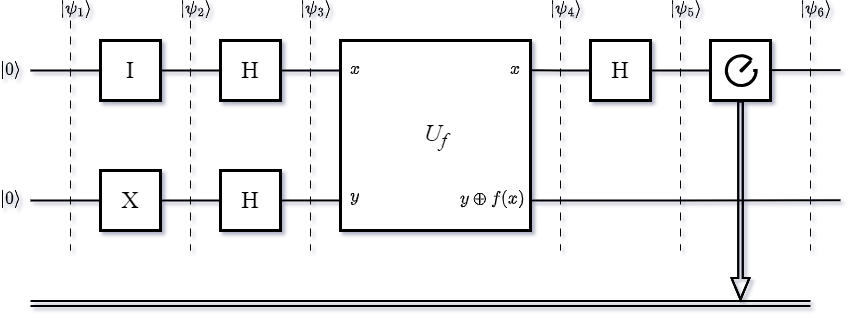

*Figure: Deutsch's Algorithm Circuit*


The Deutsch's Algorithm is illustrated in the diagram above. The state of the system at various stages are labeled $\ket{\psi_1}, .., \ket{\psi_6}$. 

Using the various techniques already explained in the previous section we are going to work through the various stages of the algorithm and observe the states of the system. 

#### $\ket{\psi_1}$

At this stage, the both qubits are at the state of $\ket{0}$ thus, 

$\ket{\psi_1} = \ket{0} \otimes \ket{0} = \begin{bmatrix}1\\0\end{bmatrix} \otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix} 1 \begin{bmatrix} 1\\0\end{bmatrix} \\[5mm] 0 \begin{bmatrix}1\\0\end{bmatrix}\end{bmatrix} = \begin{bmatrix} 1\\0\\0\\0\end{bmatrix}$

#### $\ket{\psi_2}$

At this stage, a NOT gate is applied to the second qubit and the first one is left alone (i.e. Identity gate). This will result in a resultant operation defined by  $I \otimes X$. 

The final state of the system at this point will be:

 $\ket{\psi_2} = (I \otimes X) \ket{\psi_1}, \quad$ where $X$ is the NOT gate. 

$\ket{\psi_2}=\Bigl(\begin{bmatrix} 1&0 \\ 0&1\end{bmatrix} \otimes \begin{bmatrix} 0&1 \\ 1&0 \end{bmatrix} \Bigr) \begin{bmatrix} 1\\0\\0\\0\end{bmatrix}= \begin{bmatrix}1 \begin{bmatrix} 0&1 \\ 1&0\end{bmatrix} & 0 \begin{bmatrix} 0&1 \\ 1&0\end{bmatrix} \\[5mm] 0 \begin{bmatrix} 0&1 \\ 1&0\end{bmatrix} & 1 \begin{bmatrix} 0&1 \\ 1&0\end{bmatrix}\end{bmatrix} \begin{bmatrix} 1\\0\\0\\0\end{bmatrix} = \begin{bmatrix} 0&1&0&0 \\ 1&0&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{bmatrix} \begin{bmatrix} 1\\0\\0\\0\end{bmatrix} = \begin{bmatrix} 0\\1\\0\\0\end{bmatrix}$


#### $\ket{\psi_3}$

At this stage, a Hadamard gate is applied to both qubits. This will result in the resultant operation $H \otimes H$ begin applied to the system's current state. 

$\ket{\psi_3} = (H \otimes H) \ket{\psi_2}$

$\ket{\psi_3} = \Bigl( \frac{1}{\sqrt{2}} \begin{bmatrix}1&1\\[2mm]1&-1\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}1&1\\[2mm]1&-1\end{bmatrix} \Bigr) \begin{bmatrix} 0\\1\\0\\0\end{bmatrix} = \frac{1}{\sqrt{2}\sqrt{2}} \begin{bmatrix} 1 \begin{bmatrix}1&1\\[2mm]1&-1\end{bmatrix} & 1 \begin{bmatrix}1&1\\[2mm]1&-1\end{bmatrix} \\[5mm] 1 \begin{bmatrix}1&1\\[2mm]1&-1\end{bmatrix} & -1 \begin{bmatrix}1&1\\[2mm]1&-1\end{bmatrix}\end{bmatrix} \begin{bmatrix} 0\\1\\0\\0\end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1&1&1&1 \\ 1&-1&1&-1 \\ 1&1&-1&-1 \\ 1&-1&-1&1 \end{bmatrix} \begin{bmatrix} 0\\1\\0\\0\end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix}$ 

#### $\ket{\psi_4}$

At this stage the qubits go through the oracle and is transformed based on the encoded function in the oracle. To know what is going on here, we are going to create a model of the oracle for various scenarios i.e. when the function $f$ is $f_1, f_2, f_3$ and $f_4$ respectively.

The following section describe what happens in the oracle for various scenarios and attempts to produce an algorithm that replicates this action using circuits and and matrices. 

#### Oracle Design

To design the oracle, we first have to understand what each function $f1, f2, f3, f4$ does for every permutation of the states of $x$ and $y$.

From the diagram above, the Oracle does nothing to the first bit $x$ but transforms the second bit $y$ to $y \oplus f(x)$

#### Constant `0` function $f_1$ 


 $x$| $y$ | $f_1(x)$ | $x \to x$ | $y \to y \oplus f_1(x)$ | $\ket{xy}$ | $\ket{x} \ket{y\oplus f_1(x)}$ 
 :-:| :-: | :-: | :-: | :-: | :-: | :-:
 0 | 0 | 0 | 0 | 0 | 00 | 00
 0 | 1 | 0 | 0 | 1 | 01 | 01
 1 | 0 | 0 | 1 | 0 | 10 | 10
 1 | 1 | 0 | 1 | 1 | 11 | 11

 From the table above we could conclude that to implement the Oracle with the function $f_1$, then the identity operation should be applied to both $x$ and $y$.
 
 $\ket{x} \ket{y\oplus f_1(x)}\equiv \ket{xy} = I \ket{xy}$

 $U_{f_1} = \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&1&0 \\ 0&0&0&1 \end{bmatrix}$

 $\ket{\psi_{4_1}} = I \psi_3 = \frac{1}{2} \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&1&0 \\ 0&0&0&1 \end{bmatrix}  \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix}$

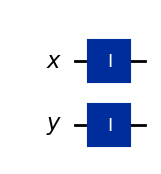

In [178]:
import qiskit as QS
from qiskit import Aer,  transpile


def oracle_constant0() :
    x = QS.QuantumRegister(1, "x")
    y = QS.QuantumRegister(1, "y")
    f = QS.QuantumCircuit(x, y)
    f.id(x)
    f.id(y)
    return f

oracle_constant0().draw(output='mpl', style="iqp")

#### Identity function $f_2$

 $x$| $y$ | $f_2(x)$ | $x \to x$ | $y \to y \oplus f_2(x)$ | $\ket{xy}$ | $\ket{x} \ket{y\oplus f_2(x)}$ 
 :-:| :-: | :-: | :-: | :-: | :-: | :-:
 0 | 0 | 0 | 0 | 0 | 00 | 00
 0 | 1 | 0 | 0 | 1 | 01 | 01
 1 | 0 | 1 | 1 | 1 | 10 | 11
 1 | 1 | 1 | 1 | 0 | 11 | 10

 From the table above, we can devise that to implement the Oracle with the function $f_2$, then the control-NOT gate will be used using $x$ and $y$ as the control and target qubits respectively. 

 $\ket{x} \ket{y\oplus f_1(x)} \equiv  CNOT \ket{xy}, \quad$ where $CX$ is the Controlled-NOT gate

 $U_{f_2} = \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{bmatrix}$

 $\ket{\psi_{4_2}} = CNOT\ket{\psi_3} = \frac{1}{2}\begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{bmatrix} \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1\\-1\\-1\\1\end{bmatrix}$ 

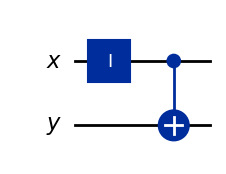

In [179]:
def oracle_identity() :
    x = QS.QuantumRegister(1, "x")
    y = QS.QuantumRegister(1, "y")
    f = QS.QuantumCircuit(x, y)
    f.id(x)
    f.cx(x,y)
    return f

oracle_identity().draw(output='mpl', style="iqp")

#### NOT function $f_3$

 $x$| $y$ | $f_3(x)$ | $x \to x$ | $y \to y \oplus f_3(x)$ | $\ket{xy}$ | $\ket{x} \ket{y\oplus f_3(x)}$ 
 :-:| :-: | :-: | :-: | :-: | :-: | :-:
 0 | 0 | 1 | 0 | 1 | 00 | 01
 0 | 1 | 1 | 0 | 0 | 01 | 00
 1 | 0 | 0 | 1 | 0 | 10 | 10
 1 | 1 | 0 | 1 | 1 | 11 | 11

 From the table above, to implement the Oracle with the function $f_3$, then the NOT of $y$ after applying control-NOT using $x$ and the initial $y$ as control and target qubits respectively. 

$U_{f_3} = \begin{bmatrix} 0&1&0&0 \\ 1&0&0&0 \\ 0&0&1&0 \\ 0&0&0&1\end{bmatrix}$

 $\ket{\psi_{4_3}} = X(CNOT)\ket{\psi_3} = \frac{1}{2}\begin{bmatrix} 0&1&0&0 \\ 1&0&0&0 \\ 0&0&1&0 \\ 0&0&0&1\end{bmatrix} \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix} = \frac{1}{2} \begin{bmatrix} -1\\1\\1\\-1\end{bmatrix}$ 

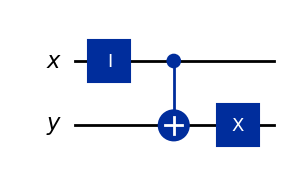

In [180]:
def oracle_NOT() :
    x = QS.QuantumRegister(1, "x")
    y = QS.QuantumRegister(1, "y")
    f = QS.QuantumCircuit(x, y)
    f.id(x)
    f.cx(x,y)
    f.x(y)
  
    return f

oracle_NOT().draw(output='mpl', style="iqp")

#### Constant `1` function $f_4$

 $x$| $y$ | $f_3(x)$ | $x \to x$ | $y \to y \oplus f_3(x)$ | $\ket{xy}$ | $\ket{x} \ket{y\oplus f_3(x)}$ 
 :-:| :-: | :-: | :-: | :-: | :-: | :-:
 0 | 0 | 1 | 0 | 1 | 00 | 01
 0 | 1 | 1 | 0 | 0 | 01 | 00
 1 | 0 | 1 | 1 | 1 | 10 | 11
 1 | 1 | 1 | 1 | 0 | 11 | 10

 From the table above, to implement the Oracle with the function $f_4$, then the NOT of quibit $y$ will suffice.

 $U_{f_4} = I \otimes X = \begin{bmatrix} 0&1&0&0 \\ 1&0&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{bmatrix}$

 $\ket{\psi_{4_4}} = (I \otimes X)\ket{\psi_3} = \frac{1}{2}\begin{bmatrix} 0&1&0&0 \\ 1&0&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{bmatrix} \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix} = \frac{1}{2} \begin{bmatrix} -1\\1\\-1\\1\end{bmatrix}$


In [181]:
def oracle_constant1() :
    x = QS.QuantumRegister(1, "x")
    y = QS.QuantumRegister(1, "y")
    f = QS.QuantumCircuit(x, y)
    f.id(x)
    f.x(y)
  
    return f

oracle_constant1().draw(output='mpl', style="iqp")


def deutsch_circuit(f: QS.QuantumCircuit):
    x = QS.QuantumRegister(1, "x")
    y = QS.QuantumRegister(1, "y")
    c = QS.ClassicalRegister(1, "c")
    circuit = QS.QuantumCircuit(x, y, c)
    circuit.id(x)
    circuit.x(y)
    circuit.h(x)
    circuit.h(y)
    circuit.barrier()
    circuit = circuit.compose(f)
    circuit.barrier()
    circuit.h(x)
    circuit.id(y)
    circuit.measure(x, c)
    return circuit

#### $\ket{\psi_5}$

At this stage of the circuit the operation $(H \otimes I)$ is done on the state of the system $\ket{\psi_{4_i}}$

Where $(H \otimes I) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1&1 \\ 1&-1\end{bmatrix} \otimes \begin{bmatrix} 1&0 \\ 0&1\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \begin{bmatrix} 1&0 \\ 0&1\end{bmatrix} & 1 \begin{bmatrix} 1&0 \\ 0&1\end{bmatrix} \\[3mm] 1 \begin{bmatrix} 1&0 \\ 0&1\end{bmatrix} & -1 \begin{bmatrix} 1&0 \\ 0&1\end{bmatrix}\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1&0&1&0 \\ 0&1&0&1 \\ 1&0&-1&0 \\ 0&1&0&-1\end{bmatrix}$

$\ket{\psi_{5_1}} = (H \otimes I)\ket{\psi_{4_1}} = \frac{1}{2\sqrt{2}} \begin{bmatrix} 1&0&1&0 \\ 0&1&0&1 \\ 1&0&-1&0 \\ 0&1&0&-1\end{bmatrix} \begin{bmatrix} 1\\-1\\1\\-1\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1\\-1\\0\\0\end{bmatrix}$

$\ket{\psi_{5_2}} = (H \otimes I)\ket{\psi_{4_2}} = \frac{1}{2\sqrt{2}} \begin{bmatrix} 1&0&1&0 \\ 0&1&0&1 \\ 1&0&-1&0 \\ 0&1&0&-1\end{bmatrix} \begin{bmatrix} 1\\-1\\-1\\1\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 0\\0\\1\\-1\end{bmatrix}$

$\ket{\psi_{5_3}} = (H \otimes I)\ket{\psi_{4_3}} = \frac{1}{2\sqrt{2}} \begin{bmatrix} 1&0&1&0 \\ 0&1&0&1 \\ 1&0&-1&0 \\ 0&1&0&-1\end{bmatrix} \begin{bmatrix} -1\\1\\1\\-1\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 0\\0\\-1\\1\end{bmatrix}$

$\ket{\psi_{5_4}} = (H \otimes I)\ket{\psi_{4_4}} = \frac{1}{2\sqrt{2}} \begin{bmatrix} 1&0&1&0 \\ 0&1&0&1 \\ 1&0&-1&0 \\ 0&1&0&-1\end{bmatrix} \begin{bmatrix} -1\\1\\-1\\1\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} -1\\1\\0\\0\end{bmatrix}$

#### $\ket{\psi_6}$ **Measurement**

This is the final stage of the Algorithm involves measuring only the first bit of state of the system. Earlier assumptions suggests that the state of a Compound system with 2 systems $X, Y$ is $\Gamma \times \Sigma \to \{ ac, ad, bc, bd\}$ where $\Gamma \to \{a, b\}, \Sigma \to \{c, d\}$

$\ket{\psi_{5_1}} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\-1\\0\\0\end{bmatrix} \equiv \begin{bmatrix} ac\\ad\\bc\\bd\end{bmatrix} \to \begin{matrix} ac = \frac{1}{\sqrt{2}} \implies a \neq 0, c \neq 0 \\ ad = \frac{-1}{\sqrt{2}}  \implies a \neq 0, d \neq 0 \\ bc = 0 \implies b = 0, \text{since } c \neq 0\\bd = 0 \implies b = 0, \text{since } d \neq 0\end{matrix}$

Since we are only measuring the first system and the Euclidean Norm of a quibit is given by $\lvert a \rvert^2 + \lvert b \rvert^2 = 1$

$a^2 = 1 \implies a=1, b=0$

$C_1 = \ket{0}$




{'0': 1024}


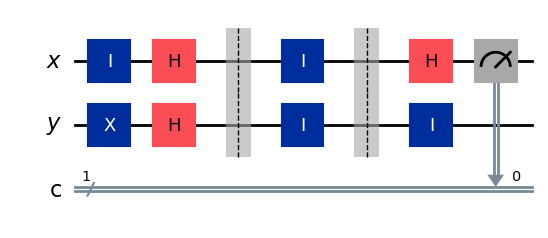

In [182]:

qc = deutsch_circuit(oracle_constant0())
simulator = Aer.get_backend('aer_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()

print(result.get_counts())
    
qc.draw(output='mpl', style="iqp")



$\ket{\psi_{5_2}} = \frac{1}{\sqrt{2}}\begin{bmatrix} 0\\0\\1\\-1\end{bmatrix} \equiv \begin{bmatrix} ac\\ad\\bc\\bd\end{bmatrix} \to \begin{matrix} ac = 0 \implies a = 0, \text{since } c \neq 0 \\ ad = 0  \implies a = 0, \text{since } d \neq 0 \\ bc = \frac{1}{\sqrt{2}} \implies b \neq 0, c \neq 0\\ bd = \frac{-1}{\sqrt{2}} \implies b \neq 0, d \neq 0\end{matrix}$

$\lvert a \rvert^2 + \lvert b \rvert^2 = 1$

$b^2 = 1 \implies b=1, a=0$

$C_2 = \ket{1}$

{'1': 1024}


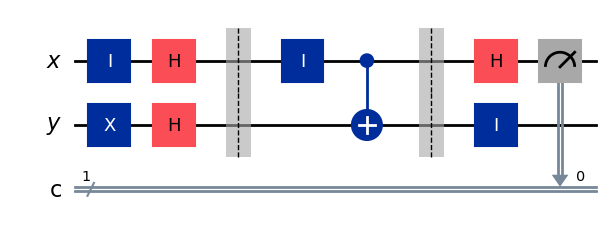

In [183]:

qc = deutsch_circuit(oracle_identity())
simulator = Aer.get_backend('aer_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()

print(result.get_counts())
    
qc.draw(output='mpl', style="iqp")


$\ket{\psi_{5_3}} = \frac{1}{\sqrt{2}}\begin{bmatrix} 0\\0\\-1\\1\end{bmatrix} \equiv \begin{bmatrix} ac\\ad\\bc\\bd\end{bmatrix} \to \begin{matrix} ac = 0 \implies a = 0, \text{since } c \neq 0 \\ ad = 0  \implies a = 0, \text{since } d \neq 0 \\ bc = \frac{-1}{\sqrt{2}} \implies b \neq 0, c \neq 0\\ bd = \frac{1}{\sqrt{2}} \implies b \neq 0, d \neq 0\end{matrix}$

$\lvert a \rvert^2 + \lvert b \rvert^2 = 1$

$b^2 = 1 \implies b=1, a=0$

$C_3 = \ket{1}$

{'1': 1024}


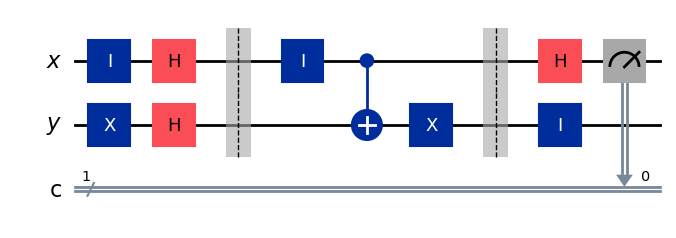

In [184]:

qc = deutsch_circuit(oracle_NOT())
simulator = Aer.get_backend('aer_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()

print(result.get_counts())
    
qc.draw(output='mpl', style="iqp")

$\ket{\psi_{5_4}} = \frac{1}{\sqrt{2}}\begin{bmatrix} -1\\1\\0\\0\end{bmatrix} \equiv \begin{bmatrix} ac\\ad\\bc\\bd\end{bmatrix} \to \begin{matrix} ac = \frac{-1}{\sqrt{2}} \implies a \neq 0, c \neq 0 \\ ad = \frac{1}{\sqrt{2}}  \implies a \neq 0, d \neq 0 \\ bc = 0 \implies b = 0, \text{since } c \neq 0\\bd = 0 \implies b = 0, \text{since } d \neq 0\end{matrix}$

$\lvert a \rvert^2 + \lvert b \rvert^2 = 1$

$a^2 = 1 \implies a=1, b=0$

$C_4 = \ket{0}$

{'0': 1024}


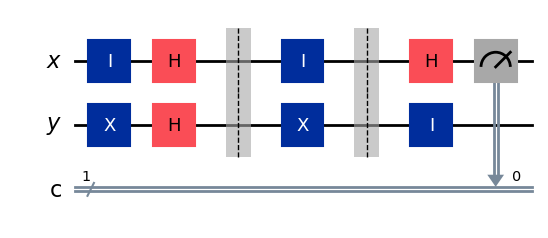

In [185]:
qc = deutsch_circuit(oracle_constant1())
simulator = Aer.get_backend('aer_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()

print(result.get_counts())
    
qc.draw(output='mpl', style="iqp")

## Conclusion

The Deutsch's Algorithm demonstrates a verifiable algorithm where a quantum computer can perform better than a classical computer. Even though the improvement is trivial, the more advanced Deutsch-Jozsa version of the algorithm offers a potential increase in exponential scale. It is also interesting to note that this algorithm is executed consistently without any error. 

# References

[1] : Introduction to Quantum Computing: Deutsch's Algorithm? Available at <a href="https://akyrillidis.github.io/notes/quant_post_8">https://akyrillidis.github.io/notes/quant_post_8</a>. Accessed on 19th October 2023

[2] :  Nitin, S., 2023. Demystifying Deutsch’s Algorithm: Constant vs. Balanced Functions, Medium. Available at: https://medium.com/@nitinanarwal99/demystifying-deutschs-algorithm-constant-vs-balanced-functions-825d1e53addd Accessed on 11th November 2023.

[3] : Basic Quantum Information: IBM, Available at <a href="https://learning.quantum.ibm.com/course/basics-of-quantum-information/">https://learning.quantum.ibm.com/course/basics-of-quantum-information/</a> Accessed on 19th October 2023

[4] : Mathematical Notions and Terminology Alphabets and Strings, Available at <a href="https://sites.radford.edu/~nokie/classes/420/Chap0-Languages.html"> https://sites.radford.edu/~nokie/classes/420/Chap0-Languages.html</a> Accessed on 2nd November 2023.




***
### End